In [41]:
#''''''''''''''''''''''''''''''''''''''''''''
# Vandit Jyotindra Gajjar
# ID: a1779153
# Introduction-to-Statistical-Machine-Learning
# Assignment: 2
#''''''''''''''''''''''''''''''''''''''''''''

time: 1.67 ms


In [42]:
!pip install ipython-autotime

time: 2.64 s


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.47 ms


Total training error:  0.09333333333333334
numItr: 0, total error : 0.0933
Total training error:  0.09333333333333334
numItr: 1, total error : 0.0933
Total training error:  0.06666666666666667
numItr: 2, total error : 0.0667
Total training error:  0.07666666666666666
numItr: 3, total error : 0.0767
Total training error:  0.05333333333333334
numItr: 4, total error : 0.0533
Total training error:  0.043333333333333335
numItr: 5, total error : 0.0433
Total training error:  0.043333333333333335
numItr: 6, total error : 0.0433
Total training error:  0.04666666666666667
numItr: 7, total error : 0.0467
Total training error:  0.043333333333333335
numItr: 8, total error : 0.0433
Total training error:  0.043333333333333335
numItr: 9, total error : 0.0433
Total training error:  0.043333333333333335
numItr: 10, total error : 0.0433
Total training error:  0.03
numItr: 11, total error : 0.03
Total training error:  0.03666666666666667
numItr: 12, total error : 0.0367
Total training error:  0.026666666

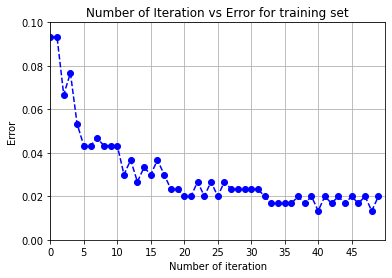

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Total testing error:  0.13382899628252787
 test: numItr: 0, total error : 0.1338
Total testing error:  0.13382899628252787
 test: numItr: 1, total error : 0.1338
Total testing error:  0.08921933085501858
 test: numItr: 2, total error : 0.0892
Total testing error:  0.10408921933085502
 test: numItr: 3, total error : 0.1041
Total testing error:  0.040892193308550186
 test: numItr: 4, total error : 0.0409
Total testing error:  0.05204460966542751
 test: numItr: 5, total error : 0.052
Total testing error:  0.05204460966542751
 test: numItr: 6, total error : 0.052
Total testing error:  0.06319702602230483
 test: numItr: 7, total error : 0.0632
Total testing error:  0.05204460966542751
 test: numItr: 8, total error : 0.052
Total testing error:  0.06691449814126393
 test: numItr: 9, total error : 0.0669
Total testing error:  0.06319702602230483
 test: numItr: 10, total error : 0.0632
Total testing error:  0.04

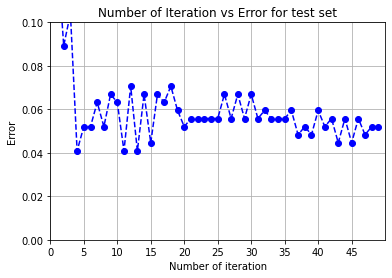

[[ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]

In [44]:
##############################################################################
# IMPLEMENTATION OF ADABOOST FROM THE PAPER - A SHORT INTRODUCTION TO BOOSTING
##############################################################################

# Importing useful libraries and modules 
import os
import random
import math as m
import matplotlib.pyplot as plt
from numpy import *
from csv import reader
%matplotlib inline
%reload_ext autotime

#Defining a function for stump classification accepts 4 parameters for predictive classification of our test set
#Parameters: Data, Dimension(Distribution), Threshold, and Threshold value for spliting examples into different groups 
#Retruns: The array
def stumpClassification(data, dimension, threshold, thresholdValue):
    returningArray, tmp = ones((shape(data)[0], 1)), data[:, dimension].tolist()
    #Applying a condition here for splits of the samples and based on that we'll create an array
    for (i, j) in enumerate(tmp):
        if thresholdValue == 'lessThan':
            if float('%.6f' % float(j[0])) < threshold: 
                returningArray[i] = -1.0
        elif thresholdValue == 'greaterThan':
            if float('%.6f' % float(j[0])) > threshold:
                returningArray[i] = -1.0
    return returningArray

#Defining a function for buiding stumps which accepts 3 parameters
#Parameters: Data, Associated Labels, and Decision for finding the best stump by using every feature of the input sample with threshold values 
#Returns: The final stump for best possible fit corresponding to data and labels, error rate, and estimator for classification of test set. 
def stumpBuilder(data, labels, decision):
    data, labelMatrix  = mat(data), mat(labels).T
    a, b = shape(data)
    steps, finalStump, finalClassifierEstimator, error   = 5.0, {}, mat(zeros((a, 1))), inf

    #Using loops for every features 
    for m in range(b):
        minimumValue, maximumValue = float('%.6f' % min(data[:, m])), float('%.6f' % max(data[:, m]))
        totalStep = (maximumValue - minimumValue) / steps
        totalStep = float('%.6f' % totalStep)
        #Creating splits based on the threshold values 
        for n in range(-1, int(steps) + 1):
            for inequal in ['lessThan', 'greaterThan']:  
                threshold = float('%.6f' % float(minimumValue + float(n) * totalStep))
                valuePrediction, arrayError= stumpClassification(data, m, threshold, inequal), mat(ones((a, 1)))
                #Here, we'll increase the error based on the predicitions for sample and it's label corresponding to threshold value
                for o in range(a):
                    if valuePrediction[o, 0] == labelMatrix[o, 0]:
                        arrayError[o] = 0  
                averageError = decision.T * arrayError 
                if averageError < error:
                    error, finalClassifierEstimator  = averageError, valuePrediction.copy()
                    finalStump['dimension'], finalStump['threshold'], finalStump['inequal']  = m, threshold, inequal
    return finalStump, error, finalClassifierEstimator

#Defining a function for classification which accepts 3 parameters and one of them has default value 
#Parameters: Data, Associated Labels, and number of iterations set to 10 in our case
#Returns: Weak learners, an array of error for the learners, and estimator for prediction of our test set. 
def adaBoostClassifierTrain(data, labels, numberOfIteration=10):
    errorList, weakLearners = [], []
    m = shape(data)[0]
    D, estimator = mat(ones((m, 1)) / m), mat(zeros((m, 1))) 
    #Here the algorithm has been created from the paper - a short introduction to boosting and alpha is the weight classifier 
    for i in range(numberOfIteration):
        bestStump, error, classEstimator = stumpBuilder(data, labels, D)  
        _alpha = float(0.5 * log((1.0 - error) / max(error, 1e-16)))  
        bestStump['_alpha'] = _alpha
        weakLearners.append(bestStump)  
        exponentialValue = multiply(-1 * _alpha * mat(labels).T, classEstimator)
        D = multiply(D, exp(exponentialValue))  
        D = D / D.sum()  
        estimator = estimator + _alpha * classEstimator
        aggrigateError = multiply(sign(estimator) != mat(labels).T, ones((m, 1)))  
        totalError = (aggrigateError.sum() / m)
        print("Total training error: ", totalError)
        print('numItr: {0}, total error : {1}'.format(i, round(totalError, 4)))
        errorList.append(round(totalError, 4))
        #Setting the condition if we reaches and error of 0, we'll immediately break it. 
        #if totalError == 0.0:
        #    break
    return weakLearners, estimator, errorList

#Defining a function to make predictions on our test set based on the trained classifier from the previous function and accepts 3 parameters 
#Parameters: Data for making predicitons, classifier trained from previous function, and test labels 
#Returns: a list of error values on our test set based on the weak learners
def adaBoostClassification(dataClass, trainedClassifier, labelTest):
    errorArray = []
    classEstimator = mat(zeros((shape(mat(dataClass))[0], 1)))
    for i in range(len(trainedClassifier)):
        classification = stumpClassification(mat(dataClass), trainedClassifier[i]['dimension'], \
                                 trainedClassifier[i]['threshold'], \
                                 trainedClassifier[i]['inequal'])
        classEstimator = classEstimator + trainedClassifier[i]['_alpha'] * classification
        error = multiply(sign(classEstimator) != mat(labelTest).T, ones((shape(mat(dataClass))[0], 1)))
        errorArray.append((error.sum() / shape(mat(dataClass))[0]))
        print("Total testing error: ", (error.sum() / shape(mat(dataClass))[0]))
        print(' test: numItr: {0}, total error : {1}'.format(i, round((error.sum() / shape(mat(dataClass))[0]), 4)))
    return sign(classEstimator), errorArray

#Defiing a function fo plotting the error curve which has different attributes
#This returns a graph for error curve consiting number of iterations vs. error rate for train/test set
def plotF(errorArray, title='unknown', xlabel='unknown', ylabel='unknown', ylim=0.1):
    plt.plot([x for x in range(len(errorArray))], errorArray, 'ro-', linewidth=1.5, marker='.', markersize=12, color='blue', linestyle = 'dashed')
    plt.grid(True)
    plt.xlim(0, len(errorArray))
    plt.ylim(0, ylim)
    plt.xticks([x for x in range(len(errorArray)) if x % 5 == 0], [x for x in [x for x in range(len(errorArray))] if x % 5 == 0], rotation=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

#Defining a function to change the labels and set it to either +1/-1 for training the adaboost classifier on train set
#Returns the converted labels if not proper. 
def convertLabel(label):
    for i in range(0, label.size):
        if label[i] == 'B':
            label[i] = -1
        else:
            label[i] = 1
    return label

#Defining a function for our data loading which accepts one parameter and which is our input data CSV file
#This returns the data and associated labels having 300 training samples and other for testing samples for prediction of our trained adaboost classifier 
def dataLoader(file):
    with open(file, 'rt', encoding='UTF-8') as rawData:
        read = reader(rawData, delimiter=',')
        data = array(list(read))

    dataTrain, dataTest = data[:300, 2:], data[300:, 2:]
    dataTrain_y, dataTest_y  = convertLabel(data[:300, 1:2]).reshape(-1),  convertLabel(data[300:, 1:2]).reshape(-1)
    dataTrain_y, dataTest_y = array(dataTrain_y, dtype='float_').tolist(),  array(dataTest_y, dtype='float_').tolist()

    return dataTrain, dataTrain_y, dataTest, dataTest_y

#Main file for execution which gives the training/testing error for different iterations and an error curve for number of iterations vs error rate
#Here the prediction of labels are also printed in order for verification  
if __name__ == '__main__':
    dataTrainX, dataTrainY, dataTestX, dataTestY = dataLoader('/content/drive/My Drive/Colab Notebooks/ISML_a2 (1)/wdbc_data.csv')

    dataTrainX, dataTestX = mat(dataTrainX), mat(dataTestX)
    dataTrainY, dataTestY = array(dataTrainY, dtype='float_').tolist(), array(dataTestY, dtype='float_').tolist()

    weakLearners, estimation, totalError = adaBoostClassifierTrain(dataTrainX, dataTrainY, 50)
    plotF(totalError, title='Number of Iteration vs Error for training set', xlabel='Number of iteration', ylabel='Error')
    %load_ext autotime
    testLabelPrediction, testError = adaBoostClassification(dataTestX, weakLearners, dataTestY)
    #print(weakLearners)
    plotF(testError, title='Number of Iteration vs Error for test set', xlabel='Number of iteration', ylabel='Error')
    print(testLabelPrediction)
    print(testError)
    print(sum(testError)/len(testError))

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28
epoch: 29
epoch: 30
epoch: 31
epoch: 32
epoch: 33
epoch: 34
epoch: 35
epoch: 36
epoch: 37
epoch: 38
epoch: 39
epoch: 40
epoch: 41
epoch: 42
epoch: 43
epoch: 44
epoch: 45
epoch: 46
epoch: 47
epoch: 48
epoch: 49
[0.09999999999999998, 0.13666666666666671, 0.09999999999999998, 0.09333333333333338, 0.09999999999999998, 0.15666666666666662, 0.1433333333333333, 0.14, 0.10333333333333339, 0.1166666666666667, 0.1166666666666667, 0.10333333333333339, 0.10999999999999999, 0.10333333333333339, 0.09333333333333338, 0.10333333333333339, 0.12, 0.10333333333333339, 0.09666666666666668, 0.08999999999999997, 0.09999999999999998, 0.08333333333333337, 0.09999999999999998, 0.07333333333333336, 0.1166666666666667, 0.1366666666666667

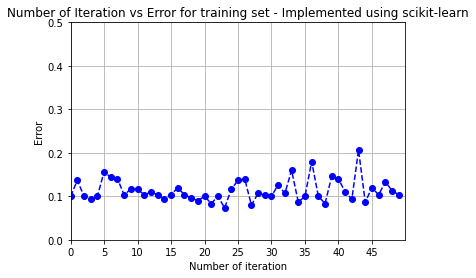

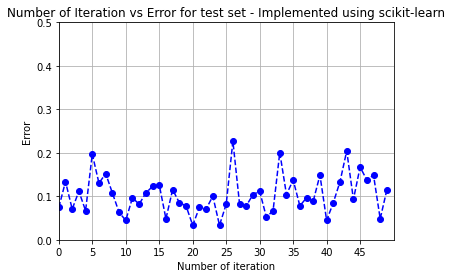

time: 52 s


In [45]:
##############################################################################
# IMPLEMENTATION OF ADABOOST FROM SCIKIT-LEARN OPEN SOURCE LIBRARY
##############################################################################

# Importing useful libraries and modules 
import os
import random
import math as m
import matplotlib.pyplot as plt
from numpy import *
from csv import reader
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
%reload_ext autotime

#Reading our data CSV file and converting to corresponding train and test with labels and splitting into 300 train set and remaining for test set
with open('/content/drive/My Drive/Colab Notebooks/ISML_a2 (1)/wdbc_data.csv', 'rt', encoding='UTF-8') as rawData:
    read = reader(rawData, delimiter=',')
    data = array(list(read))

dataTrain, dataTest = data[:300, 2:], data[300:, 2:]
dataTrain_y, dataTest_y  = convertLabel(data[:300, 1:2]).reshape(-1),  convertLabel(data[300:, 1:2]).reshape(-1)

#Initialising the exsiting model available on scikit-learn 
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=0.01, algorithm='SAMME', random_state=1)

#Initialisation of variables such as epoch, batches, classes and other variables for storing the values 
trainingSamples = dataTrain.shape[0]
numberOfEpoch, numberOfBatch, numberOfClass = 50, 30, unique(dataTrain_y)
trainingScore, testingScore, epoch = [], [], 0

#Running loop for satisfying the condition and stop when it is necessary 
#Creating batches for training to our classifier 
#This loop also computes the train/test error and saves it to list by appending one-by-one. 
while epoch < numberOfEpoch:
    trainPredictionY, testPredictionY,  = [], []
    print('epoch:', epoch)
    randomSample, miniBatch = random.permutation(dataTrain.shape[0]), 0
    while True:
        model.fit(dataTrain[randomSample[miniBatch: miniBatch + numberOfBatch]], dataTrain_y[randomSample[miniBatch: miniBatch + numberOfBatch]])
        miniBatch = miniBatch + numberOfBatch
        if miniBatch >= trainingSamples:
            break
    for testPrediction in model.predict(dataTest):
        testPredictionY.append(testPrediction)
    for trainPrediction in model.predict(dataTrain):
        trainPredictionY.append(trainPrediction)

    traininAccuracygScore, testingAccuracyScore = accuracy_score(trainPredictionY, dataTrain_y), accuracy_score(testPredictionY, dataTest_y)
    testingScore.append(testingAccuracyScore)
    trainingScore.append(traininAccuracygScore)

    epoch += 1

#Once we get the error rate, we can also get the accuracy score as accuracy = 1 - error-rate, 
#and printing them and plotting the graphs from the plotF function
trainingScore, testingScore  = [1.0 - x for x in trainingScore], [1.0 - x for x in testingScore]
print(trainingScore)
print(testingScore)
calculateErrorTrain = sum(trainingScore)/len(trainingScore)
print('train_error:', calculateErrorTrain)
calculateErrorTest = sum(testingScore)/len(testingScore)
print('test_error:', calculateErrorTest)

plotF(trainingScore, title='Number of Iteration vs Error for training set - Implemented using scikit-learn', xlabel='Number of iteration', ylabel='Error', ylim=0.5)
plotF(testingScore, title='Number of Iteration vs Error for test set - Implemented using scikit-learn', xlabel='Number of iteration', ylabel='Error', ylim=0.5)

In [46]:
#############################################################################################################
# IMPLEMENTATION OF SVM FOR COMPARIOSN OF THE RESULTS WITH ADABOOST BY USING SCIKIT-LEARN OPEN SOURCE LIBRARY
#############################################################################################################

# Importing useful libraries and modules
import os
import random
import math as m
import matplotlib.pyplot as plt
from numpy import *
from sklearn.svm import SVC
%reload_ext autotime

#Loading the dataset and splitting corresponding to train/test data and labels and splitting them to 300 train set and reminaing for test set
dataTrainX, dataTrainY, dataTestX, dataTestY = dataLoader('/content/drive/My Drive/Colab Notebooks/ISML_a2 (1)/wdbc_data.csv')
dataTrainY = asarray(dataTrainY)

#We uses SVM classifier with regularisation parameter set to optimal of 1.0 and uses linear kernel for the same and fitting the data
model = SVC(C=100.0, kernel='linear', gamma='auto')
model.fit(dataTrainX, dataTrainY)

#Model prediction and printing the labels for varification 
predict_y = model.predict(dataTestX).reshape(-1).tolist()
print(predict_y)
print(dataTestY)

#Calculating the total error on test set. 
error = 0
for intem_p, item_y in zip(predict_y, dataTestY):
    if intem_p != item_y:
        error +=1

totalError = float(error/len(dataTestY))
print(totalError)

[1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0